In [1]:
import pandas as pd

In [2]:
df= pd.read_csv('c:/Users/91959/Desktop/aftech/clean_fraudCombined.csv')

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [4]:
columns_order = ['merchant', 'category', 'amt', 'gender', 'street', 'city', 'state', 'zip', 'lat', 'long', 'city_pop', 'job', 'merch_lat', 'merch_long','DOB_Year', 'DOB_Month', 'trns_Month', 'trns_Hour', 'is_fraud']
df = df[columns_order]

In [5]:
X = df.iloc[:,:-1]
Y = df['is_fraud']

In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [10]:
rf_classifier = RandomForestClassifier()

rf_classifier.fit(X_train, Y_train)

y_pred = rf_classifier.predict(X_test)

accuracy = accuracy_score(Y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9985910132558121


In [11]:
# import pickle

# pickle.dump(rf_classifier, open('rand_fors_fraud_v1', 'wb'))

In [12]:
import pickle

rf_classifier = pickle.load(open('rand_fors_fraud_v1', 'rb'))
type(rf_classifier)

sklearn.ensemble._forest.RandomForestClassifier

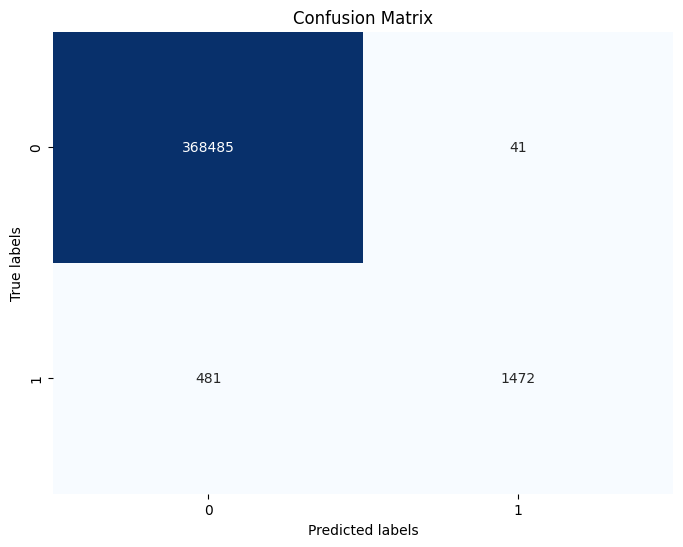

In [13]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(Y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [14]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    368526
           1       0.97      0.75      0.85      1953

    accuracy                           1.00    370479
   macro avg       0.99      0.88      0.92    370479
weighted avg       1.00      1.00      1.00    370479

